In [1]:
from numbers import Number
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import onix.models.hyperfine as hyperfine
from IPython.display import display

%matplotlib ipympl

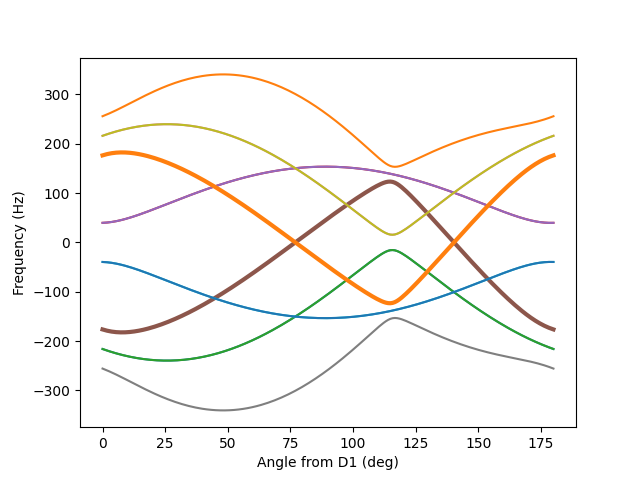

In [30]:
f1s = []
f2s = []
f3s = []
f4s = []
angles = np.linspace(0, np.pi, 200)
B_field = 10e-3

for angle in angles:
    index_0 = 4
    index_1 = 5
    ground = hyperfine.states["7F0"]
    ground._Hamiltonian = ground.H_total([B_field * np.cos(angle), B_field * np.sin(angle), 0])
    excited = hyperfine.states["5D0"]
    excited._Hamiltonian = excited.H_total([B_field * np.cos(angle), B_field * np.sin(angle), 0])
    energies_g = ground.energies_and_eigenstates()[0]
    energies_e = excited.energies_and_eigenstates()[0]
    f1s.append((energies_e[index_0] - energies_g[index_0]) * 1000)
    f2s.append((energies_e[index_1] - energies_g[index_0]) * 1000)
    f3s.append((energies_e[index_0] - energies_g[index_1]) * 1000)
    f4s.append((energies_e[index_1] - energies_g[index_1]) * 1000)

f1s = np.array(f1s)
f2s = np.array(f2s)
f3s = np.array(f3s)
f4s = np.array(f4s)
fig, ax = plt.subplots()
ax.plot(angles * 180 / np.pi, f1s - f2s)
ax.plot(angles * 180 / np.pi, f2s - f3s)
ax.plot(angles * 180 / np.pi, f3s - f4s)
ax.plot(angles * 180 / np.pi, f1s - f3s)
ax.plot(angles * 180 / np.pi, f2s - f4s)
ax.plot(angles * 180 / np.pi, f1s - f4s, linewidth=3)
ax.plot(angles * 180 / np.pi, f2s - f1s)
ax.plot(angles * 180 / np.pi, f3s - f2s)
ax.plot(angles * 180 / np.pi, f4s - f3s)
ax.plot(angles * 180 / np.pi, f3s - f1s)
ax.plot(angles * 180 / np.pi, f4s - f2s)
ax.plot(angles * 180 / np.pi, f4s - f1s, linewidth=3)
ax.set_xlabel("Angle from D1 (deg)")
ax.set_ylabel("Frequency (Hz)")
plt.show()